Clustering 성능 비교
군집화의 경우에는 분류문제와 달리 성능기준을 만들기 어렵다. 심지어는 원래 데이터가 어떻게 군집화되어 있었는지를 보여주는 정답(groundtruth)이 있는 경우도 마찬가지이다. 따라서 다양한 성능기준이 사용되고 있다. 다음의 군집화 성능기준의 예다.

조정 랜드지수(Adjusted Rand Index) 조정 상호정보량 (Adjusted Mutual Information) 실루엣계수 (Silhouette Coefficient)

타깃값이 필요 없는 군집용 지표로 실루엣 계수(silhouette coefficient) 가 있습니다. 그러나 이 지표는 실제로 잘 작동하지 않습니다. 실루엣 점수는 클러스터의 밀집 정도를 계산하는 것으로, 높을수록 좋으며 최대 점수는 1입니다. 밀집된 클러스터가 좋긴 하지만 모양이 복잡할 때는 평가가 잘 들어맞지 않습니다. (원형 클러스터에서 값이 더 높게 나옴)

reference : https://m.blog.naver.com/jinty/221719520925, https://m.blog.naver.com/PostView.nhn?blogId=slykid&logNo=221850725829&categoryNo=&currentPage=&sortType=&isFromSearch=true&proxyReferer=https:%2F%2Fwww.google.com%2F,  https://gentlej90.tistory.com/64

https://towardsdatascience.com/gaussian-mixture-models-gmm-6e95cbc38e6e : gmm

gmm fuzzy membership 값 비교해야 돼

# iris
iris 데이터는 정답데이터가 있으니까 그걸로 성능을 비교하자 --> reference : https://eunsukimme.github.io/ml/2019/12/16/K-Means/, https://m.blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221155659188&proxyReferer=https:%2F%2Fwww.google.com%2F

## iris_kmeans

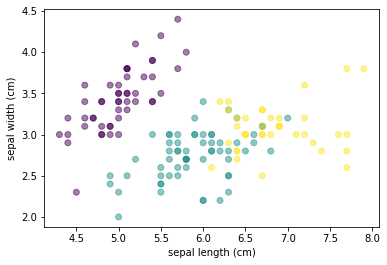

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
samples = iris.data
# 3개의 그룹으로 나누는 K-Means 모델을 생성합니다
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)
# 클러스터링 결과를 시각화합니다
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### Evaluation
using Cross Tabulation

In [5]:
import numpy as np
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'

In [6]:
import pandas as pd

df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0               50              0             0
1                0             48            14
2                0              2            36


Setosa 는 100%의 정확도로 분류되었습니다.
Versicolor 는 96%의 정확도로 분류되었습니다.
Virginica 는 72%의 정확도로 분류

### 보다 자세하게

In [60]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


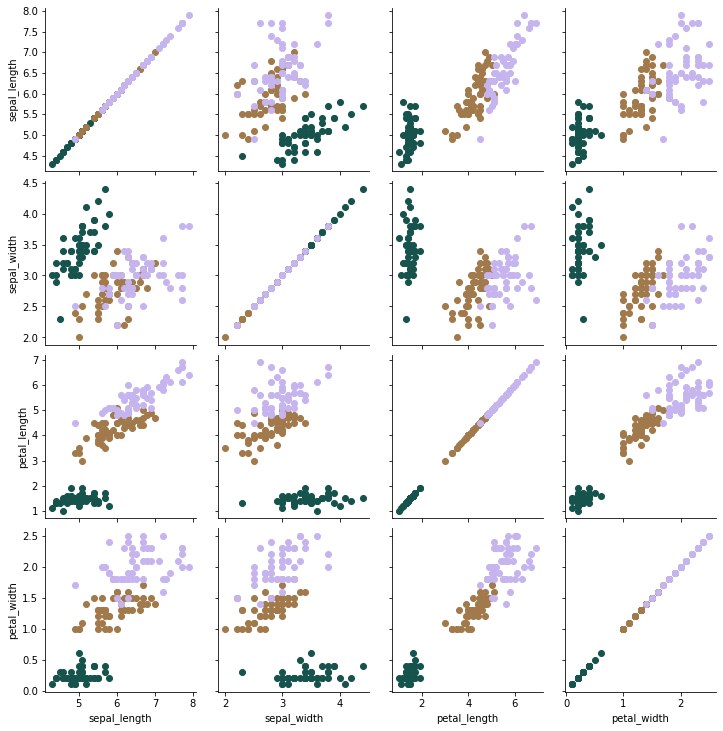

In [61]:
g = sns.PairGrid(iris, hue="species", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [39]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

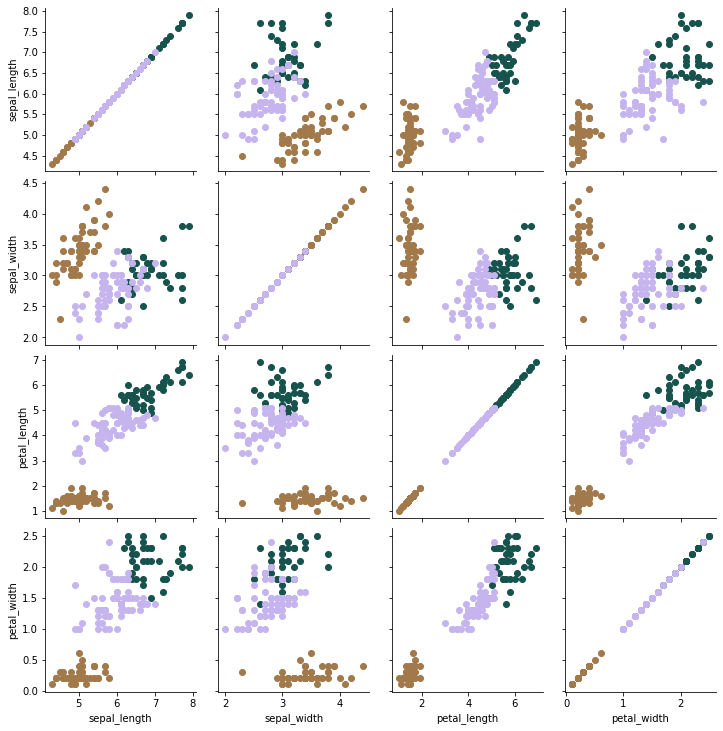

In [40]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue="kmeans_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [41]:
# TODO: Import adjusted rand score
from sklearn import metrics

# TODO: calculate adjusted rand score passing in the original labels and the kmeans predicted labels 
iris_kmeans_score = metrics.adjusted_rand_score(iris['species'],iris['kmeans_pred'])

# Print the score
iris_kmeans_score

0.7302382722834697

In [42]:
iris = datasets.load_iris()
import numpy as np
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'

In [44]:
import pandas as pd

df = pd.DataFrame({'pred_kmeans_iris': pred_kmeans_iris, 'species': species})
ct = pd.crosstab(df['pred_kmeans_iris'], df['species'])
print(ct)

species           b'setosa'  b'versicolor'  b'virginica'
pred_kmeans_iris                                        
0                         0              2            36
1                        50              0             0
2                         0             48            14


## iris_fuzzy c means
reference : https://www.kaggle.com/prateekk94/fuzzy-c-means-clustering-on-iris-dataset

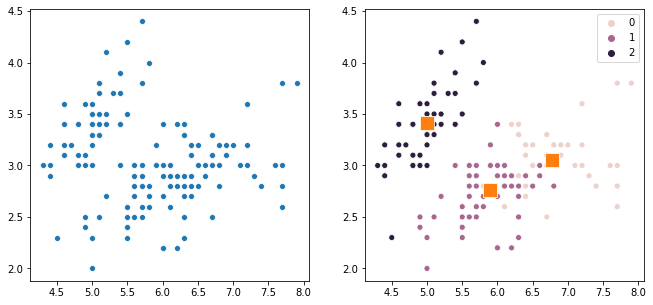

In [49]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

# data
iris = datasets.load_iris()
samples = iris.data

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(samples)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
# axes[] 설명 ; https://nittaku.tistory.com/117
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(samples[:,0], samples[:,1], ax=axes[0])
scatter(samples[:,0], samples[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

### Evaluation

In [20]:
import numpy as np
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'

In [21]:
# fcm_labels 에서는 2가 setosa, 1이 versicolor, 0이 virginica 유의!

import pandas as pd

df = pd.DataFrame({'fcm_labels': fcm_labels, 'species': species})
ct = pd.crosstab(df['fcm_labels'], df['species'])
print(ct)

species     b'setosa'  b'versicolor'  b'virginica'
fcm_labels                                        
0                   0              3            37
1                   0             47            13
2                  50              0             0


setosa는 100%의 정확도로 분류, versicolor는 94%의 정확도로 분류, virginica는 74%의 정확도로 분류

### all features

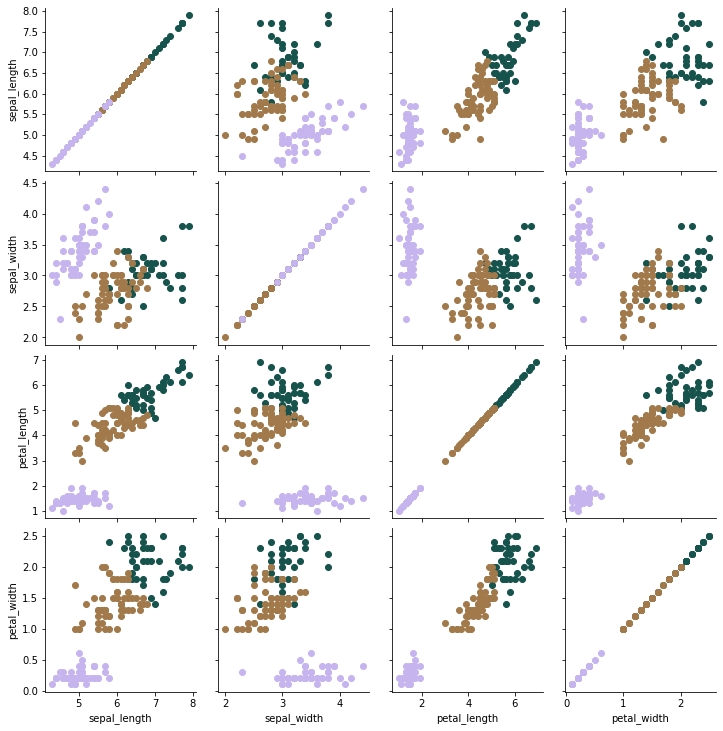

In [63]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
import seaborn as sns
iris = sns.load_dataset("iris")


model = FCM(n_clusters = 3)
model.fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_fcm_iris = model.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

iris['fcm_pred'] = pred_fcm_iris

g = sns.PairGrid(iris, hue="fcm_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [66]:
# TODO: Import adjusted rand score
from sklearn import metrics

# TODO: calculate adjusted rand score passing in the original labels and the kmeans predicted labels 
iris_fcm_score = metrics.adjusted_rand_score(iris['species'],iris['fcm_pred'])

# Print the score
iris_fcm_score

0.7294203486015404

In [55]:
iris = datasets.load_iris()
import numpy as np
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'

In [56]:
import pandas as pd

df = pd.DataFrame({'pred_fcm_iris': pred_fcm_iris, 'species': species})
ct = pd.crosstab(df['pred_fcm_iris'], df['species'])
print(ct)

species        b'setosa'  b'versicolor'  b'virginica'
pred_fcm_iris                                        
0                      0              3            37
1                      0             47            13
2                     50              0             0


## iris_GMM
reference : https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering, https://programming.rhysshea.com/GMM_clustering/, https://techblog-history-younghunjo1.tistory.com/108

In [30]:
# TODO: Import GaussianMixture
from sklearn import mixture

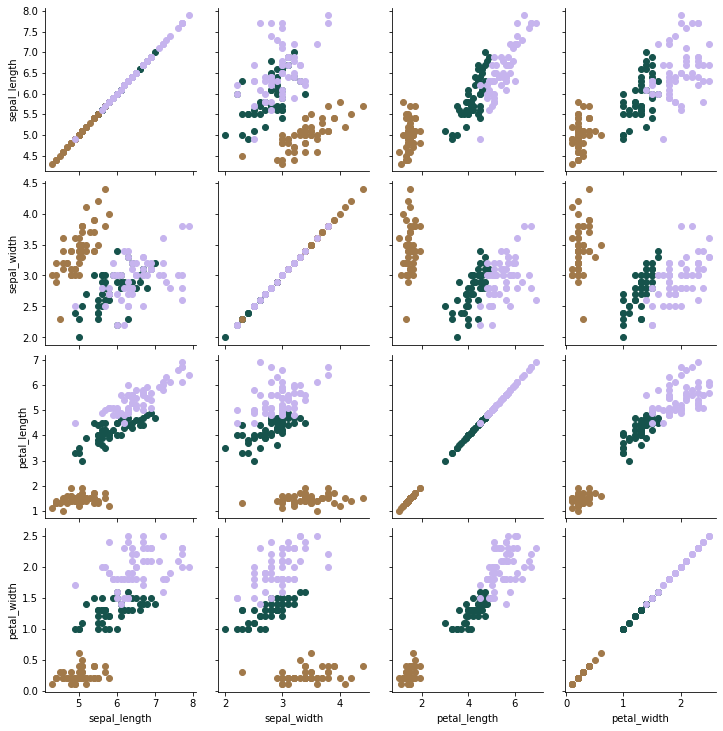

In [31]:
gmm_iris = mixture.GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

iris['gmm_pred']=pred_gmm_iris
g = sns.PairGrid(iris, hue="gmm_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [32]:
iris['gmm_pred'] = pred_gmm_iris

# TODO: calculate adjusted rand score passing in the original 
# labels and the GMM predicted labels iris['species']
iris_gmm_score = metrics.adjusted_rand_score(iris['species'],pred_gmm_iris)

# Print the score
iris_gmm_score

0.9038742317748124

In [45]:
import numpy as np
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'

In [46]:
import pandas as pd

df = pd.DataFrame({'pred_gmm_iris': pred_gmm_iris, 'species': species})
ct = pd.crosstab(df['pred_gmm_iris'], df['species'])
print(ct)

species        b'setosa'  b'versicolor'  b'virginica'
pred_gmm_iris                                        
0                      0             45             0
1                     50              0             0
2                      0              5            50


# Generated Dataset

## kmeans

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[5, 1, 0.5],
                             random_state=3)
X, y = varied[0], varied[1]

plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X)

In [ ]:
plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=pred, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

## FCM
https://kr.mathworks.com/help/fuzzy/adjust-fuzzy-overlap-in-fuzzy-c-means-clustering.html, https://kr.mathworks.com/help/fuzzy/cluster-quasi-random-data-using-fuzzy-c-means-clustering.html : fuzzy membership

## GMM

In [12]:
from sklearn.mixture import GaussianMixture

import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs

X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
X = np.dot(X, np.random.RandomState(0).randn(2,2))

In [13]:
GMM = GaussianMixture(n_components=3)
GMM.fit(X)
Y = np.random.randint(-10, 20, size=(1, 2))
print(GMM.means_, GMM.predict_proba(Y))

[[-12.83538756   4.89646219]
 [ 19.79345085  17.48737208]
 [ 11.01122173  18.68280257]] [[1.79246117e-04 9.71428180e-07 9.99819782e-01]]
